In [1]:
## MP 573 Lecture 10: More Sampling
##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
#%matplotlib inline
%matplotlib notebook
import numpy as np
from IPython.display import display, Image, HTML
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import math 
from PIL import Image

This is an example of a LaTeX block

$$\hat{f}(u) = \int{f(x) e^{-i 2 \pi x u} dx}$$

In [2]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx = len(f)
sy = len(f[:])

<IPython.core.display.Javascript object>


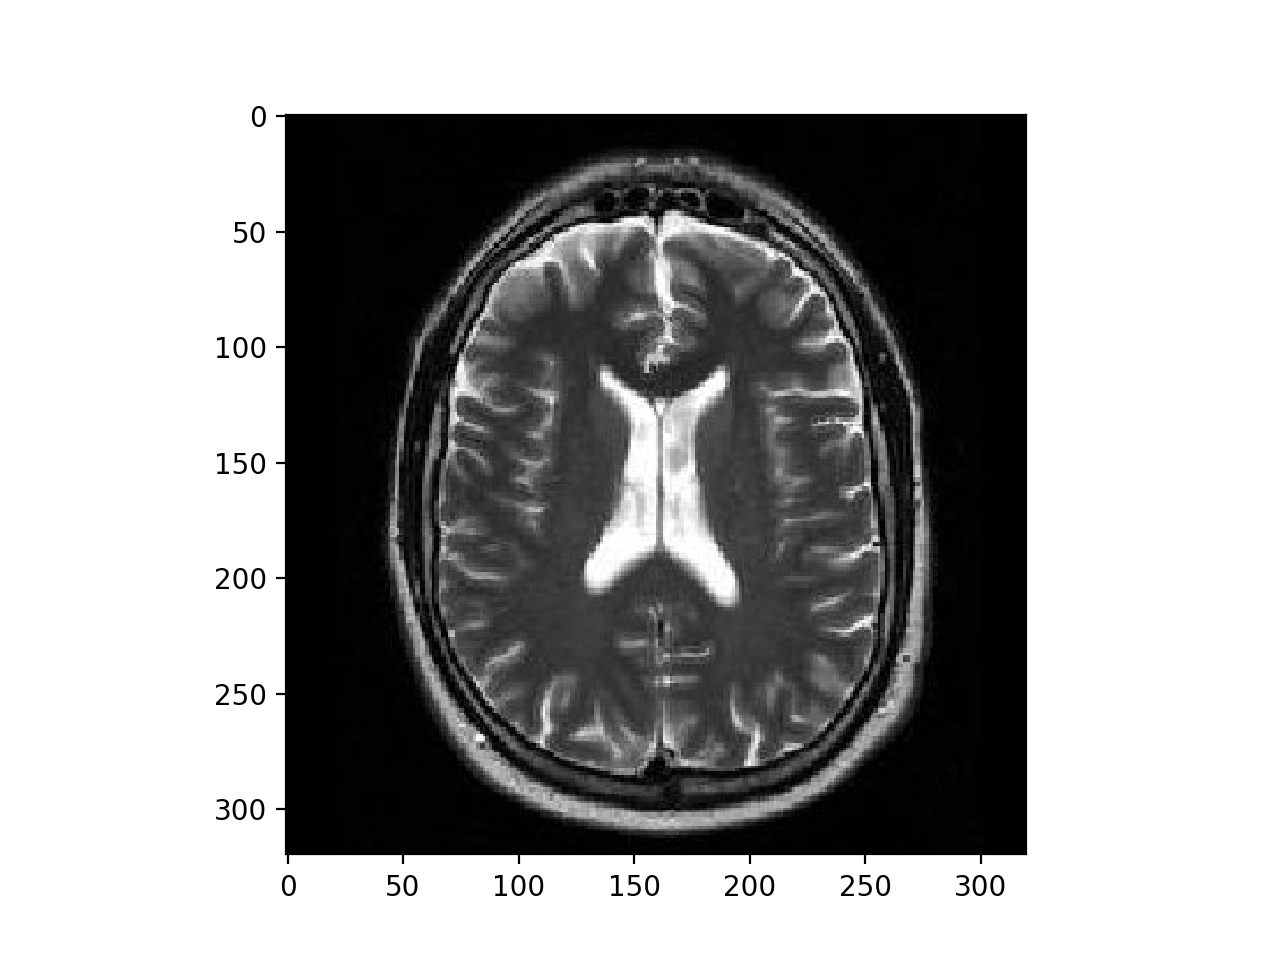

In [3]:
fig2 = plt.figure()
imgplot = plt.imshow(abs(f),cmap='gray')

<IPython.core.display.Javascript object>


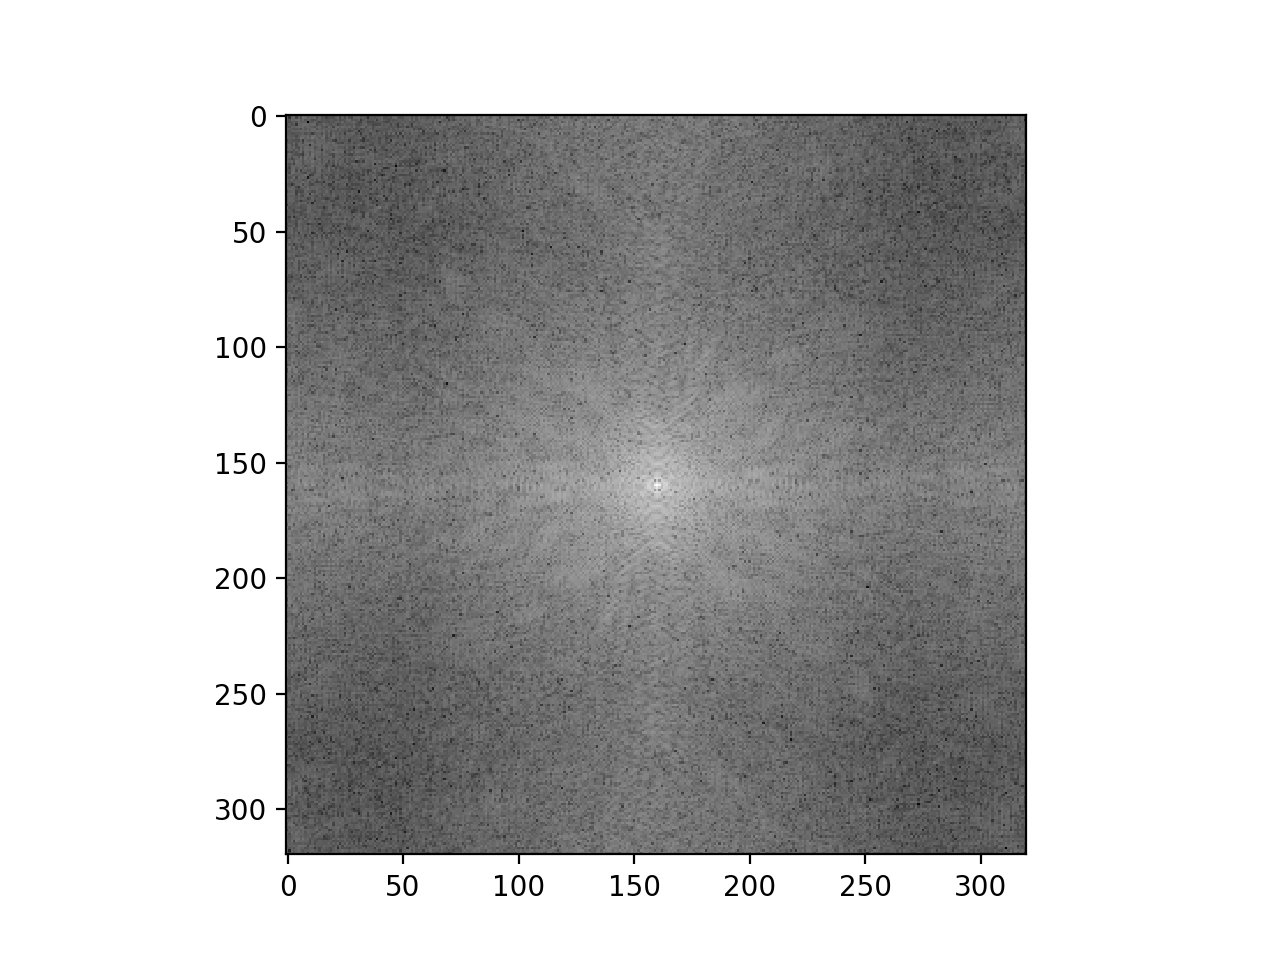

In [4]:
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
fig2 = plt.figure()
imgplot = plt.imshow(np.log(abs(fhat)),cmap='gray')

<IPython.core.display.Javascript object>


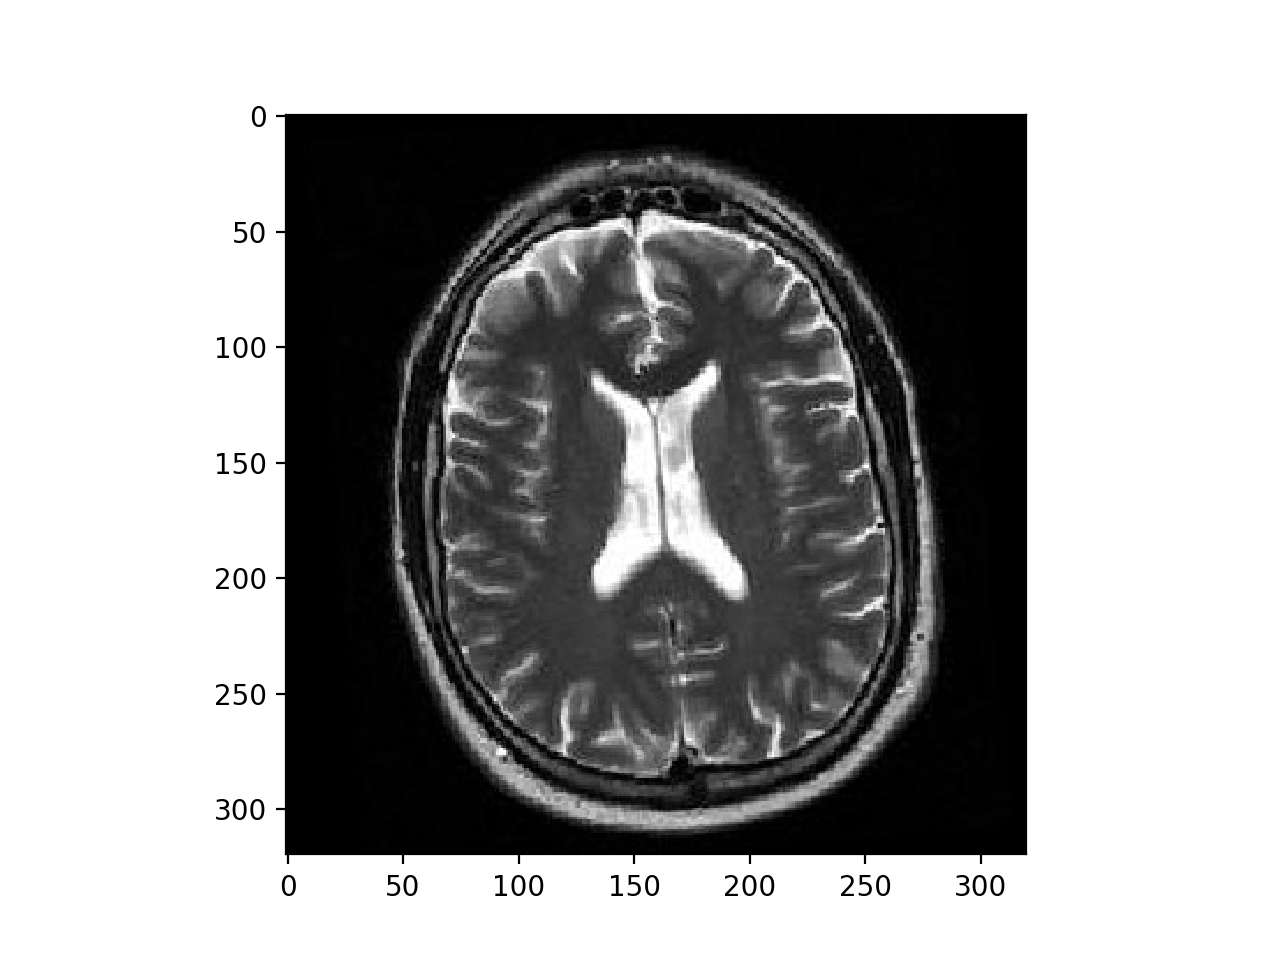

In [5]:
# Now add some motion
f3hat = 0*fhat
fig = plt.figure()
ims = []
for k in range(0,sx):
    #myrot = np.int(np.round(8*np.sin(2*math.pi*0.02*k)))
    myrot = 10*np.sin(2*math.pi*0.02*k)
    #f2 = np.roll(f,myshift,axis=1) # shift
    new_im = Image.fromarray(f)
    new_im2 = new_im.rotate(myrot,resample=Image.BICUBIC)
    f2 = np.array(new_im2)
    im = plt.imshow(abs(f2),cmap='gray',animated=True,vmin=0,vmax=1)
    
    ims.append([im])
    f2hat =  np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
    f3hat[:,k] = f2hat[:,k]
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False,
                                repeat_delay=0)
plt.show()

<IPython.core.display.Javascript object>


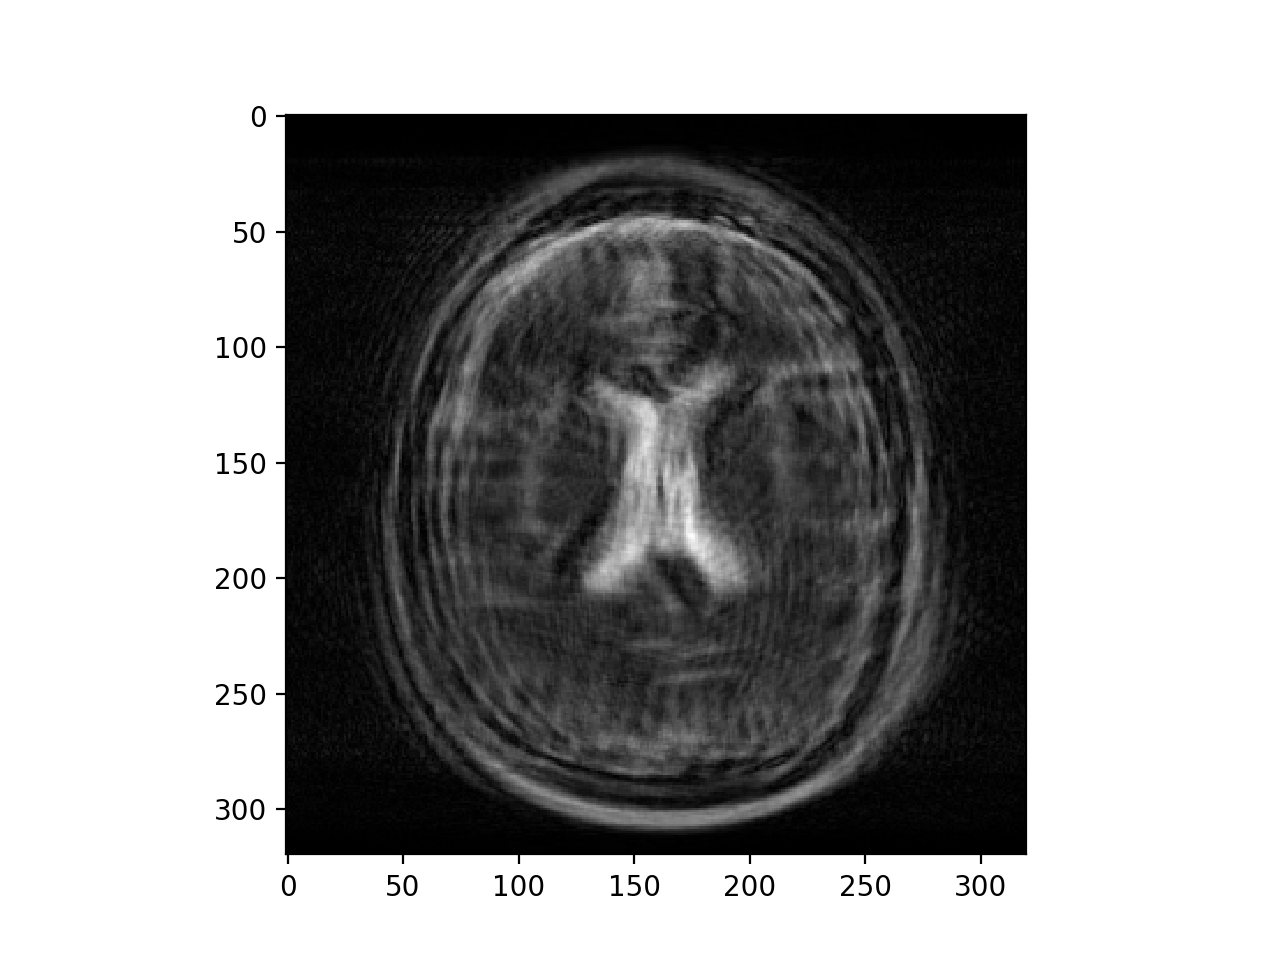

In [17]:
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(f3hat)))
fig2 = plt.figure()
imgplot = plt.imshow(abs(f3),cmap='gray')

